#  Project for an Internship at "Oasis Infobyte"


#  Task_1:Iris Flower Classification

#  Dataset:"Iris.csv"

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

# loading dataset

In [5]:
iris_df=pd.read_csv(r"IRIS.csv")
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris_df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
print("species Counts")
iris_df["species"].value_counts()

species Counts


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [12]:
#correlation
corr_=iris_df.corr()
corr_

/tmp/ipykernel_8413/2388719646.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_=iris_df.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<Axes: >

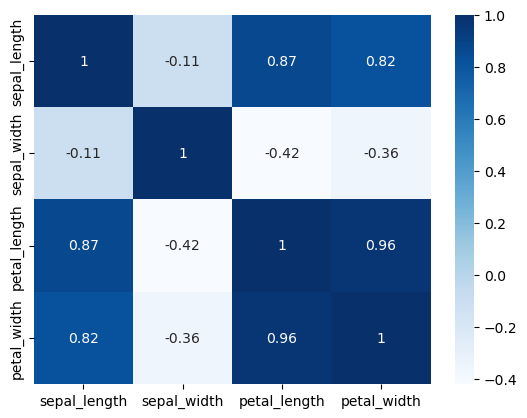

In [13]:
sns.heatmap(corr_, cmap="Blues", annot=True)

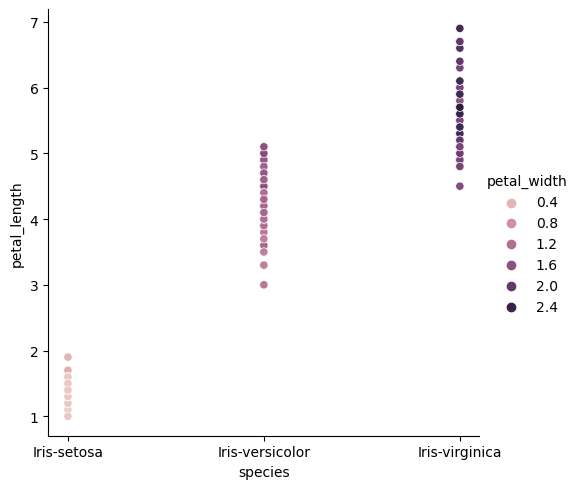

In [14]:
sns.relplot(x = iris_df["species"], y =iris_df["petal_length"],hue =iris_df["petal_width"], data = iris_df)
plt.show()

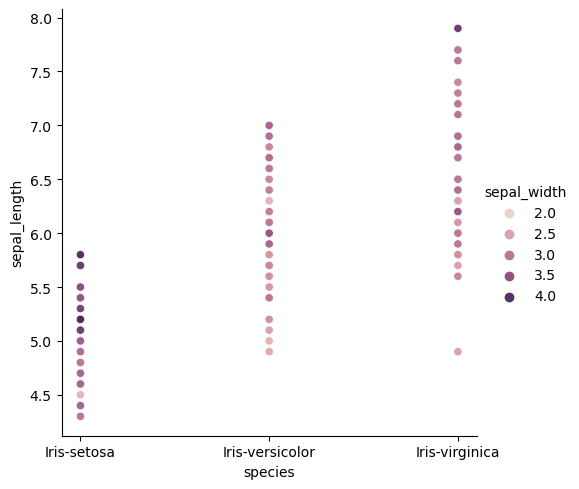

In [15]:
sns.relplot(x = iris_df["species"], y = iris_df["sepal_length"], hue = iris_df["sepal_width"], data = iris_df)
plt.show()

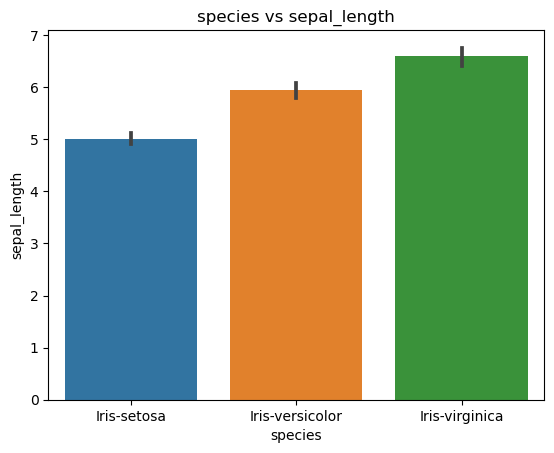

In [16]:
sns.barplot(x = iris_df["species"], y = iris_df["sepal_length"], data = iris_df)
plt.title("species vs sepal_length")
plt.show()

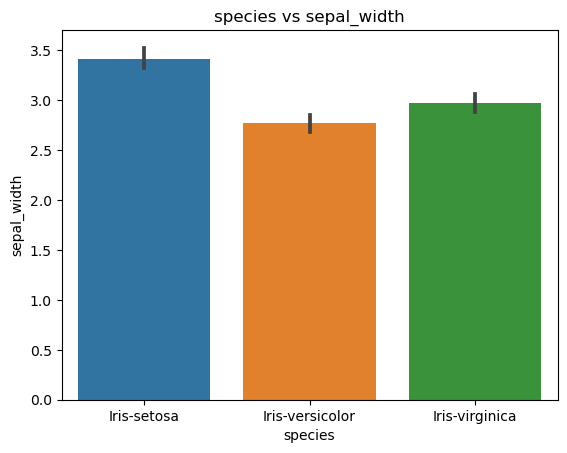

In [17]:
sns.barplot(x = iris_df["species"], y = iris_df["sepal_width"], data = iris_df)
plt.title("species vs sepal_width")
plt.show()

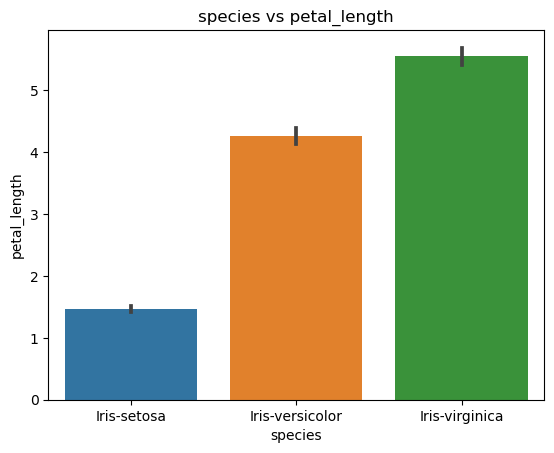

In [18]:
sns.barplot(x = iris_df["species"], y = iris_df["petal_length"], data = iris_df)
plt.title("species vs petal_length")
plt.show()

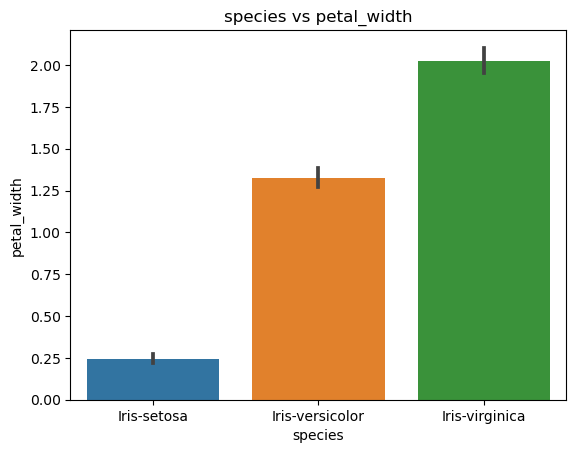

In [19]:
sns.barplot(x = iris_df["species"], y = iris_df["petal_width"], data = iris_df)
plt.title("species vs petal_width")
plt.show()

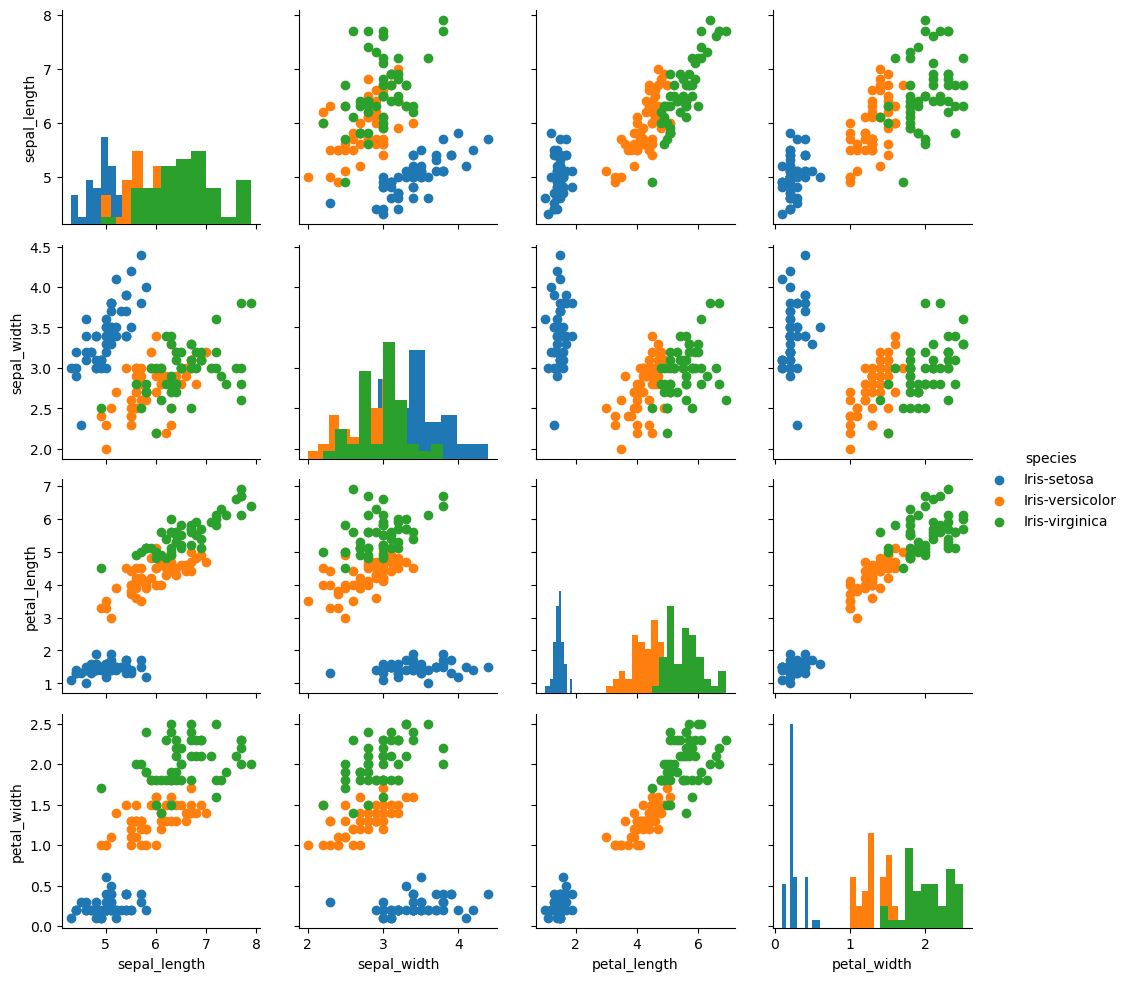

In [20]:
graph = sns.PairGrid(data=iris_df, hue = "species")
graph = graph.map_diag(plt.hist)
graph = graph.map_offdiag(plt.scatter)
graph = graph.add_legend()
plt.show()

# splitting the dataset for training and testing

In [21]:
x = iris_df[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
y = iris_df["species"]
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [22]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.20)
x_train

,sepal_length,sepal_width,petal_length,petal_width
120,6.9,3.2,5.7,2.3
146,6.3,2.5,5.0,1.9
83,6.0,2.7,5.1,1.6
78,6.0,2.9,4.5,1.5
125,7.2,3.2,6.0,1.8
...,...,...,...,...
131,7.9,3.8,6.4,2.0
30,4.8,3.1,1.6,0.2
53,5.5,2.3,4.0,1.3
132,6.4,2.8,5.6,2.2


In [24]:
y_train

120     Iris-virginica
146     Iris-virginica
83     Iris-versicolor
78     Iris-versicolor
125     Iris-virginica
            ...       
131     Iris-virginica
30         Iris-setosa
53     Iris-versicolor
132     Iris-virginica
69     Iris-versicolor
Name: species, Length: 120, dtype: object

In [25]:
x_test

,sepal_length,sepal_width,petal_length,petal_width
51,6.4,3.2,4.5,1.5
56,6.3,3.3,4.7,1.6
35,5.0,3.2,1.2,0.2
9,4.9,3.1,1.5,0.1
143,6.8,3.2,5.9,2.3
106,4.9,2.5,4.5,1.7
122,7.7,2.8,6.7,2.0
77,6.7,3.0,5.0,1.7
105,7.6,3.0,6.6,2.1
16,5.4,3.9,1.3,0.4


In [26]:
y_test

51     Iris-versicolor
56     Iris-versicolor
35         Iris-setosa
9          Iris-setosa
143     Iris-virginica
106     Iris-virginica
122     Iris-virginica
77     Iris-versicolor
105     Iris-virginica
16         Iris-setosa
74     Iris-versicolor
91     Iris-versicolor
128     Iris-virginica
36         Iris-setosa
130     Iris-virginica
82     Iris-versicolor
21         Iris-setosa
58     Iris-versicolor
68     Iris-versicolor
1          Iris-setosa
29         Iris-setosa
108     Iris-virginica
149     Iris-virginica
64     Iris-versicolor
142     Iris-virginica
86     Iris-versicolor
133     Iris-virginica
19         Iris-setosa
27         Iris-setosa
12         Iris-setosa
Name: species, dtype: object

# support vector classifier

In [27]:
from sklearn.svm import SVC
svc_model = SVC().fit(x_train, y_train)

In [28]:
predictions = svc_model.predict(x)
df = {"Actual":y,"Predicted":predictions}
pd.DataFrame(df)

,Actual,Predicted
0,Iris-setosa,Iris-setosa
1,Iris-setosa,Iris-setosa
2,Iris-setosa,Iris-setosa
3,Iris-setosa,Iris-setosa
4,Iris-setosa,Iris-setosa
...,...,...
145,Iris-virginica,Iris-virginica
146,Iris-virginica,Iris-virginica
147,Iris-virginica,Iris-virginica
148,Iris-virginica,Iris-virginica


In [29]:
y_hat = svc_model.predict(x_test)

In [30]:
#classification report using SVC model
print("\t\t CLASSIFICATION REPORT")
print("="*64)
print(classification_report(y_test, y_hat))
print("="*64)

		 CLASSIFICATION REPORT
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



Confusion Matrix
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


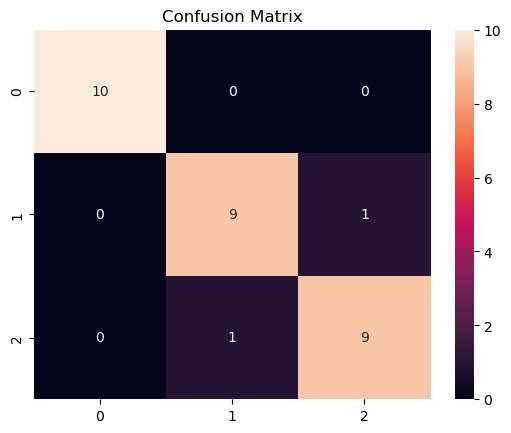

In [31]:
cm = confusion_matrix(y_test, y_hat)
print("Confusion Matrix\n", cm)
sns.heatmap(cm, annot=True)
plt.title("Confusion Matrix")
plt.show()

In [32]:
print("Accuracy Of the Support Vector Classifier Model\n",accuracy_score(y_test,y_hat)*100,'%')

Accuracy Of the Support Vector Classifier Model
 93.33333333333333 %


# Logistic Regression Model For Classification

In [33]:
lgmodel = LogisticRegression()
lgmodel.fit(x_train,y_train)

/home/mano/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
pred = lgmodel.predict(x)
pd.DataFrame({"Actual":y, "Predictions":pred})

,Actual,Predictions
0,Iris-setosa,Iris-setosa
1,Iris-setosa,Iris-setosa
2,Iris-setosa,Iris-setosa
3,Iris-setosa,Iris-setosa
4,Iris-setosa,Iris-setosa
...,...,...
145,Iris-virginica,Iris-virginica
146,Iris-virginica,Iris-virginica
147,Iris-virginica,Iris-virginica
148,Iris-virginica,Iris-virginica


In [35]:
y_hat1 = lgmodel.predict(x_test)

In [36]:
print("\t\t Classification Report")
print("="*64)
print(classification_report(y_test, y_hat))
print("="*64)

		 Classification Report
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



Confusion Matrix
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


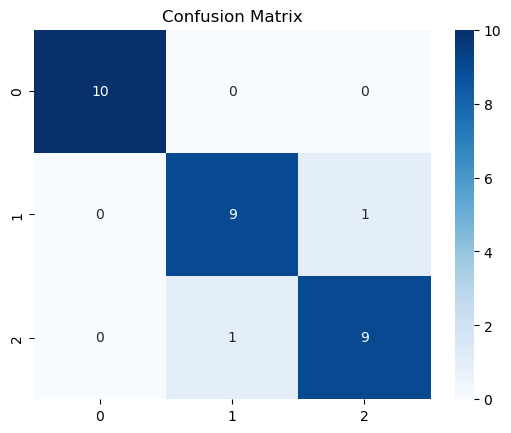

In [37]:
cm = confusion_matrix(y_test, y_hat)
print("Confusion Matrix\n", cm)
sns.heatmap(cm,cmap="Blues",annot=True)
plt.title("Confusion Matrix")
plt.show()

In [38]:
print("Accuracy Of the Logistic Regression Model:\n", accuracy_score(y_test,y_hat1)*100,"%")

Accuracy Of the Logistic Regression Model:
 93.33333333333333 %
